STEP 1.DATA PREPROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_values=df.isnull().sum

In [2]:
df = pd.read_csv('C:/Users/91948/Desktop/TASK1/ecommerce_customer_data_large.csv')

In [3]:
missing_values=df.isnull().sum()
print("missing_values",missing_values)

missing_values Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [4]:
df['Customer Age'].fillna(df['Customer Age'].median(),inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

C:\Users\91948\AppData\Local\Temp\ipykernel_2784\2129146237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Age'].fillna(df['Customer Age'].median(),inplace=True)
C:\Users\91948\AppData\Local\Temp\ipykernel_2784\2129146237.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['Purchase Date']=pd.to_datetime(df['Purchase Date'])

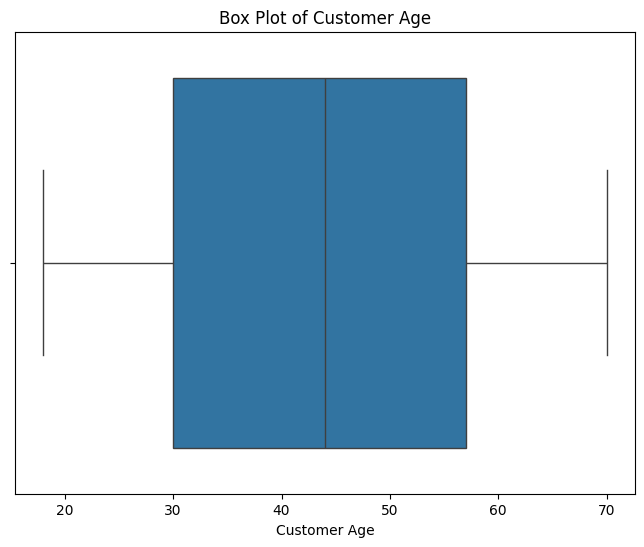

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Customer Age'])
plt.title('Box Plot of Customer Age')
plt.xlabel('Customer Age')
plt.show()

In [8]:
df=df[df['Customer Age']<=100]

STEP 2.EXPLORATORY DATA ANALYSIS

In [9]:
basic_stats=df[['Total Purchase Amount']].describe()
print("Basic Statistics of Total Purchase Amount\n",basic_stats)

Basic Statistics of Total Purchase Amount
        Total Purchase Amount
count          250000.000000
mean             2725.385196
std              1442.576095
min               100.000000
25%              1476.000000
50%              2725.000000
75%              3975.000000
max              5350.000000


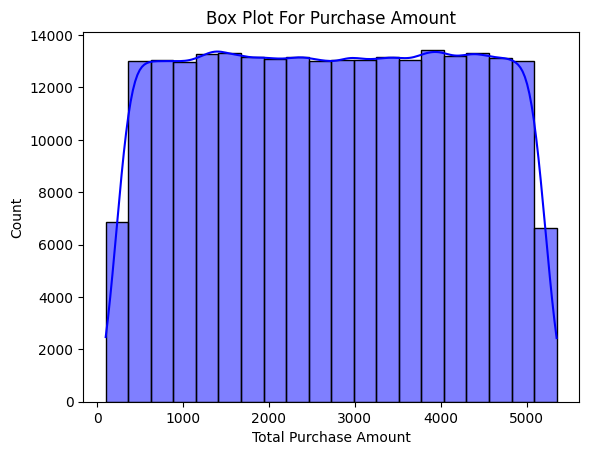

In [10]:
sns.histplot(df['Total Purchase Amount'],bins=20,kde=True,color='blue')
plt.title('Box Plot For Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.show()


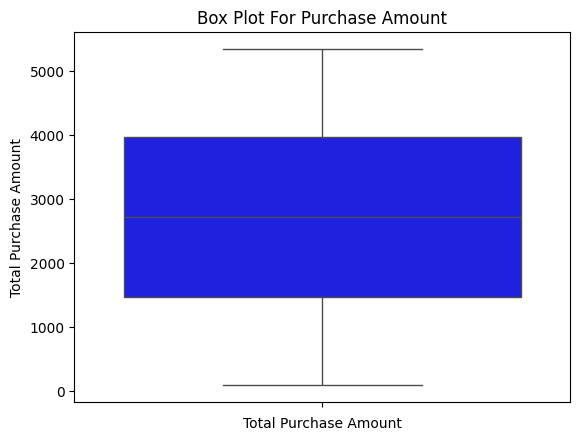

In [11]:
sns.boxplot(df['Total Purchase Amount'],color='blue')
plt.title('Box Plot For Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.show()

C:\Users\91948\AppData\Local\Temp\ipykernel_2784\688908586.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='Total Purchase Amount',data=df,estimator=sum,ci=None)


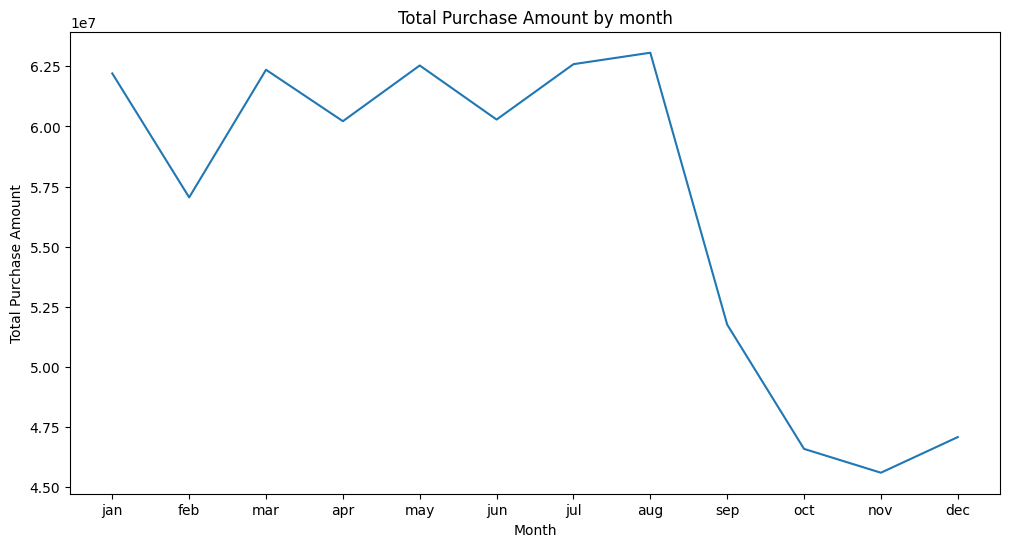

In [12]:
df['Purchase Date']=pd.to_datetime(df['Purchase Date'])
df['Month']=df['Purchase Date'].dt.month
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Total Purchase Amount',data=df,estimator=sum,ci=None)
plt.title('Total Purchase Amount by month')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(range(1,13),['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.show()


In [13]:
top_products=df['Product Category'].value_counts().head(5)
print("Top 5 Product Categories\n",top_products)
top_revenue=df.groupby('Product Category')['Total Purchase Amount'].sum().head(5)
print("Top 5 Product Categories by Revenue\n",top_revenue)

Top 5 Product Categories
 Product Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64
Top 5 Product Categories by Revenue
 Product Category
Books          169345236
Clothing       170716122
Electronics    170146025
Home           171138916
Name: Total Purchase Amount, dtype: int64


STEP 3.RFM ANALYSIS

C:\Users\91948\AppData\Local\Temp\ipykernel_2784\623247970.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot=rfm_table.pivot_table(index='F_score',columns='M_score',values='Customer ID',aggfunc='count').fillna(0)


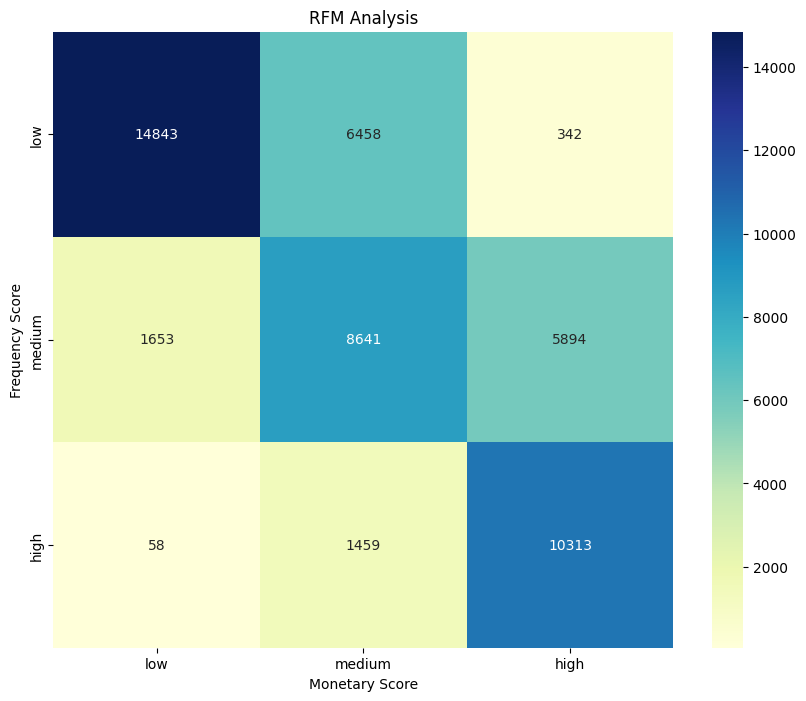

In [14]:
snapshot_date=df['Purchase Date'].max()+pd.DateOffset(days=1)
rfm_table=df.groupby('Customer ID').agg({
    'Purchase Date':lambda x:(snapshot_date-x.max()).days,
    'Customer Name':'count',
    'Total Purchase Amount':'sum'
}).reset_index()
rfm_table.rename(columns={
    'Purchase Date':'Recency',
    'Customer Name':'Frequency',
    'Total Purchase Amount':'Monetary'
},inplace=True)
rfm_table['R_score']=pd.qcut(rfm_table['Recency'],q=3,labels=['high','medium','low'])
rfm_table['F_score']=pd.qcut(rfm_table['Frequency'],q=3,labels=['low','medium','high'])
rfm_table['M_score']=pd.qcut(rfm_table['Monetary'],q=3,labels=['low','medium','high'])
rfm_table['RFM_Score']=rfm_table['R_score'].astype(str)+rfm_table['F_score'].astype(str)+rfm_table['M_score'].astype(str)
rfm_pivot=rfm_table.pivot_table(index='F_score',columns='M_score',values='Customer ID',aggfunc='count').fillna(0)
plt.figure(figsize=(10,8))
sns.heatmap(rfm_pivot,annot=True,cmap='YlGnBu',fmt="g")
plt.title('RFM Analysis')
plt.xlabel('Monetary Score')
plt.ylabel('Frequency Score')
plt.show()

STEP 4.CUSTOMER SEGMENTATION

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\91948\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


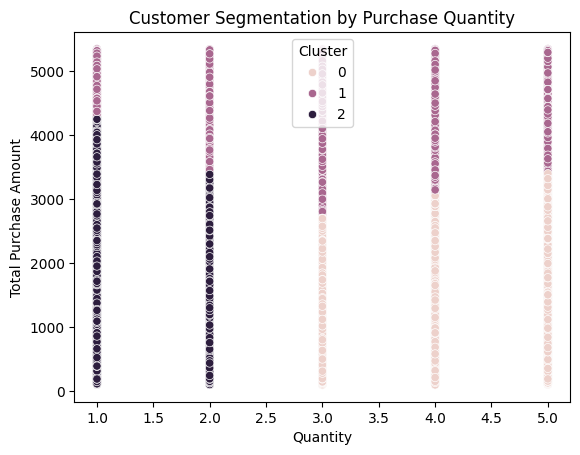

In [16]:
x=df[['Quantity','Total Purchase Amount']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
kmeans = KMeans(n_clusters=3,random_state=42)

df['cluster']=kmeans.fit_predict(x_scaled)
sns.scatterplot(x='Quantity',y='Total Purchase Amount',hue='cluster',data=df)
plt.title('Customer Segmentation by Purchase Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Purchase Amount')

plt.legend(title='Cluster')
plt.show()

STEP 5.INSIGHTS AND RECOMMENDATIONS

In [17]:
customer_segment_summary =df.groupby('cluster').agg({
    'Customer ID':'size',
    'Total Purchase Amount':'mean',
    'Quantity':'mean'
}).rename(columns={
    'Customer ID':'Customer Count',
    'Total Purchase Amount':'Average Purchase Amount',
    'Quantity':'Average Quantity'
})
print("Customer Segment Summary\n",customer_segment_summary)

Customer Segment Summary
          Customer Count  Average Purchase Amount  Average Quantity
cluster                                                           
0                 85184              1654.899864          4.081283
1                 92158              4226.276547          3.243994
2                 72658              2076.717154          1.439814


In [18]:
top_products=df['Product Category'].value_counts().head(5)
print("Top 5 Product Categories\n",top_products)

Top 5 Product Categories
 Product Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64


In [19]:
purchase_trend=df.groupby(df['Purchase Date'].dt.to_period('M'))['Total Purchase Amount'].sum()
print("Purchase Trend Over Time:\n",purchase_trend)

Purchase Trend Over Time:
 Purchase Date
2020-01    15566765
2020-02    14660710
2020-03    15517357
2020-04    15060419
2020-05    15517765
2020-06    15062859
2020-07    15575247
2020-08    16190648
2020-09    15134038
2020-10    15758325
2020-11    15281984
2020-12    15551387
2021-01    15415212
2021-02    14310637
2021-03    15386324
2021-04    14955947
2021-05    15597852
2021-06    15103252
2021-07    15811231
2021-08    15914473
2021-09    15174689
2021-10    15514099
2021-11    14725048
2021-12    15763717
2022-01    15470148
2022-02    13983870
2022-03    15720795
2022-04    15266338
2022-05    15737762
2022-06    15295853
2022-07    15997688
2022-08    15304484
2022-09    14876278
2022-10    15322821
2022-11    15597636
2022-12    15771054
2023-01    15749833
2023-02    14095137
2023-03    15731269
2023-04    14934746
2023-05    15680601
2023-06    14824102
2023-07    15203585
2023-08    15654307
2023-09     6578007
Freq: M, Name: Total Purchase Amount, dtype: int64


C:\Users\91948\AppData\Local\Temp\ipykernel_2784\66347303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='coolwarm')


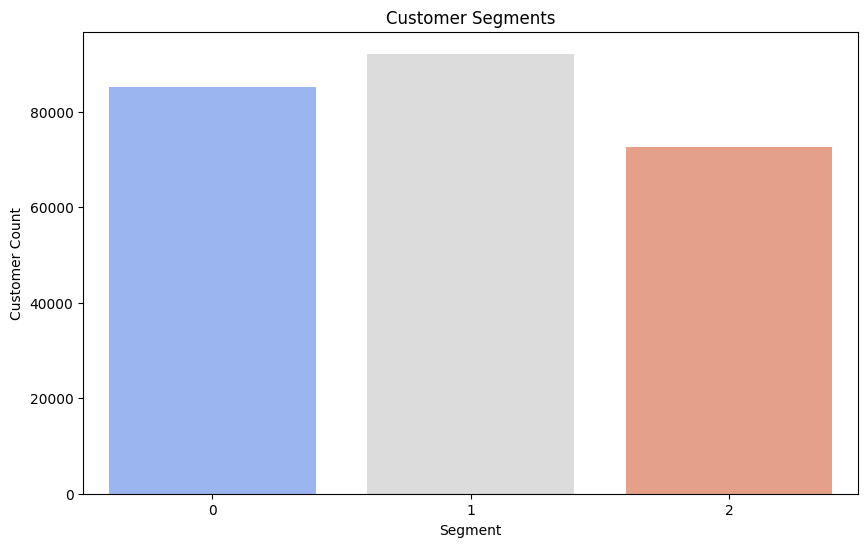

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df, palette='coolwarm')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.show()

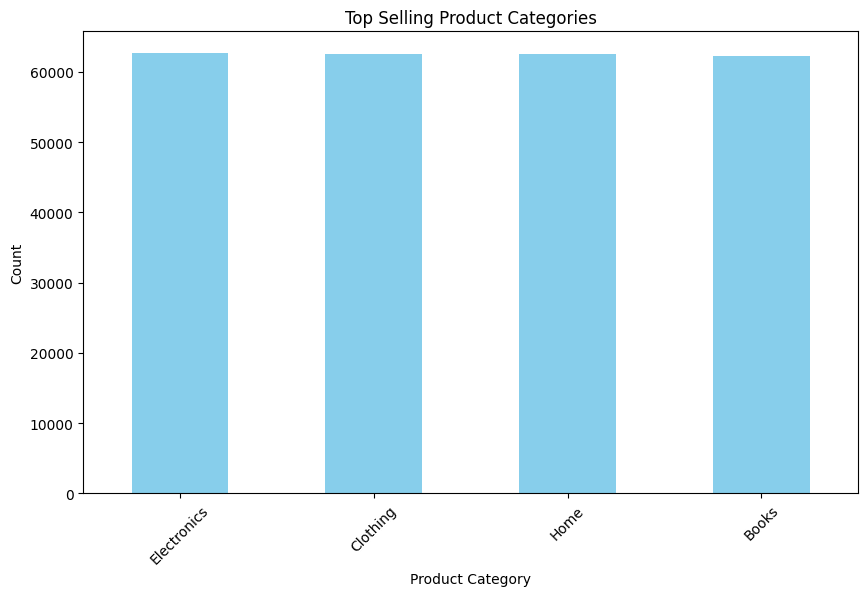

In [21]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar',color='skyblue')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

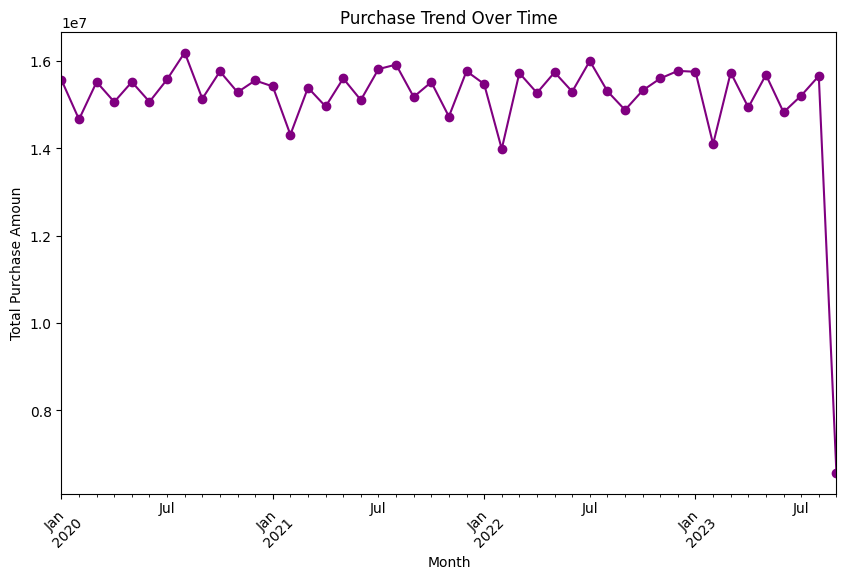

In [22]:
plt.figure(figsize=(10, 6))
purchase_trend.plot(kind='line',color='purple',marker='o')
plt.title('Purchase Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amoun')
plt.xticks(rotation=45)
plt.show()